<a href="https://colab.research.google.com/github/being3iimed/Tanitjobs-data/blob/main/FinalPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from datetime import datetime, timedelta

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Exploring data**

In [ ]:
data = pd.read_csv('/content/finalData.csv')
data.head()

,Position,Entreprise,Location,Date,Candidates,Postes,Type,Experience,Niveau,Rémunération,Langue,Genre
0,PFE internship in UI/UX Web Design,MAT-IT,"Ariana, Tunisie",Il'y a 30 minutes,0,1 poste ouvert,"Temps plein, Freelance / Indépendant",None,"Licence, Bac + 3",None,None,None
1,PFE internship: ERP Development of Research La...,Qubitron,"Tunis, Tunisie",Il'y a 32 minutes,0,1 poste ouvert,CDD,None,None,None,None,None
2,Full-Stack coder,Synexta,"Médenine, Tunisie",Il'y a 47 minutes,0,1 poste ouvert,"CDI, CDD, SIVP",1 à 3 ans,Ingénieur,Confidentiel,Français,None
3,PFE Student Engineer internship - Web developm...,MAT-IT,"Ariana, Tunisie",Il'y a 47 minutes,0,1 poste ouvert,Temps plein,Débutant,Ingénieur,None,None,None
4,University cafeteria waitress,Collège de Paris Campus Tunis,Mohamed V à côté de British Council Tunis bel...,Il'y a 2 heures,0,1 poste ouvert,CDD,0 à 1 an,None,None,None,None


<Axes: >

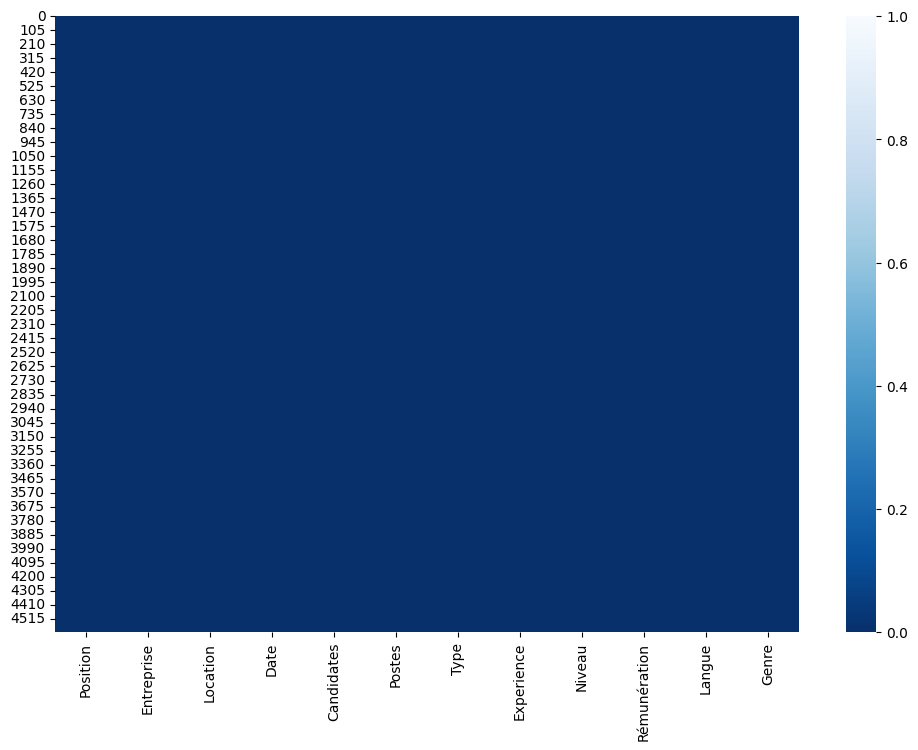

In [ ]:
#Visualizing missing values
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='Blues_r')

**Dropping unecessary data**

In [ ]:
data.drop(['Type','Niveau', 'Rémunération', 'Postes', 'Langue', 'Genre'], axis='columns', inplace=True)

In [ ]:
data.shape

6

In [ ]:
import unittest
class Col:
  def __init__(self, num):
    self.num = num

  @property
  def columnsnum(self):
    return self.num

class Test(unittest.TestCase):
  def runTest(self):
    c = Col(6)
    self.assertEqual(c.columnsnum(), data.shape[1], "incorrect value")

unittest.main(argv=['first-arg-is-ignored'], exit=False)

EE
ERROR: test_lowercase_no_punctuation (__main__.DataFrameTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 146, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index_class_helper.pxi", line 49, in pandas._libs.index.Int64Engine._check_type
KeyError: 'Position'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-45-e04f9fe2cacf>", line 13, in setUp
    self.df['Position'] = self.df['Position'] + " " + new_position
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 981, in __getitem__
    return self._get_value(key)
  File "/usr/local/lib/python3.

**Checking & Droping dupes**

In [ ]:
print(data.duplicated().sum())


91


In [ ]:
data.drop_duplicates(inplace=True)

**Checking for nulls columns**

In [ ]:
data.isnull().sum()

Position      3
Entreprise    0
Location      0
Date          0
Candidates    0
Experience    0
dtype: int64

In [ ]:
data.dropna(subset=['Position'], inplace=True)

**Removing NaN**

In [ ]:
# If candidats is NaN the we suppose that no one applied
# Giving 0 as it's value instead of NaN
# data['candidats'].fillna(0, inplace=True)
data['Candidates'].fillna(0, inplace=True)

In [ ]:
# If Experience is NaN the we suppose that they  look for Entry level no Experience
# Giving 'Débutant' as it's value instead of NaN
data['Experience'].fillna('Débutant', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4394 entries, 0 to 4617
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Position    4394 non-null   object
 1   Entreprise  4394 non-null   object
 2   Location    4394 non-null   object
 3   Date        4394 non-null   object
 4   Candidates  4394 non-null   int64 
 5   Experience  4394 non-null   object
dtypes: int64(1), object(5)
memory usage: 240.3+ KB


**Clean and Standardize Data**

In [ ]:
data['Position'] = data['Position'].str.lower()
data['Position'] = data['Position'].str.strip()

In [ ]:
data['Position']

0                      pfe internship in ui/ux web design
1       pfe internship: erp development of research la...
2                                        full-stack coder
3       pfe student engineer internship - web developm...
4                           university cafeteria waitress
                              ...                        
4610                            telecommunication advisor
4611                             human relations advisers
4613      back/front office agent (mechanical/electrical)
4616                                         model makers
4617                                    customer advisers
Name: Position, Length: 4394, dtype: object

In [ ]:
data.head()

,Position,Entreprise,Location,Date,Candidates,Experience
0,pfe internship in ui/ux web design,MAT-IT,"Ariana, Tunisie",Il'y a 30 minutes,0,None
1,pfe internship: erp development of research la...,Qubitron,"Tunis, Tunisie",Il'y a 32 minutes,0,None
2,full-stack coder,Synexta,"Médenine, Tunisie",Il'y a 47 minutes,0,1 à 3 ans
3,pfe student engineer internship - web developm...,MAT-IT,"Ariana, Tunisie",Il'y a 47 minutes,0,Débutant
4,university cafeteria waitress,Collège de Paris Campus Tunis,Mohamed V à côté de British Council Tunis bel...,Il'y a 2 heures,0,0 à 1 an


**Unit Testing**

In [ ]:
import re
class Test:

  def __init__(self):
    pass
    # self.input = input

  def remove_punctuations(self,text):
    # Check if the input is a string
    if isinstance(text, str):
        # Use re.sub to remove punctuations and symbols
        return re.sub(r'[^\w\s]', '', text)
    else:
        # If the input is not a string, return it as is or handle as needed
        return text


In [ ]:
import unittest
class TestWord(unittest.TestCase):
  def runTest(self):
    test = Test();
    self.assertEqual(test.remove_punctuations("test',()|"), "test,?", "incorrect word")

In [ ]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

F
FAIL: runTest (__main__.TestWord)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-65-da3601d8d2f3>", line 5, in runTest
    self.assertEqual(test.remove_punctuations("test',()|"), "test,?", "incorrect word")
AssertionError: 'test' != 'test,?'
- test
+ test,?
?     ++
 : incorrect word

----------------------------------------------------------------------
Ran 1 test in 0.005s

FAILED (failures=1)


**Removing punctuations and symbols**

In [ ]:
def remove_punctuations(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Use re.sub to remove punctuations and symbols
        return re.sub(r'[^\w\s]', '', text)
    else:
        # If the input is not a string, return it as is or handle as needed
        return text

In [ ]:
data['Position'] = data['Position'].apply(remove_punctuations)

**convert Date to dateTimeFormat**

In [ ]:
def convert_to_hour(input_str):
    input_parts = input_str.split()
    if len(input_parts) < 2:
        return 0  # Handle the case where the input is not in the expected format

    unit = input_parts[-1]
    value = int(input_parts[-2])

    if unit == 'h':
        return value
    elif unit == 'j':
        return value * 24
    elif unit == 's':
        return value * 7 * 24
    elif unit == 'mois':
        return value * 24 * 30
    else:
        return value / 60  # minutes

def subtract_hours_from_current_datetime(hours_to_subtract):
    current_datetime = datetime.now()
    new_datetime = current_datetime - timedelta(hours=hours_to_subtract)
    date_time_format = "%Y-%m-%d"
    formatted_datetime = new_datetime.strftime(date_time_format)
    return formatted_datetime

In [ ]:
data['Date'] = data['Date'].apply(convert_to_hour)
data['Date'] = data['Date'].apply(subtract_hours_from_current_datetime)

data.head()

,Position,Entreprise,Location,Date,Candidates,Experience
0,pfe internship in uiux web design,MAT-IT,"Ariana, Tunisie",2024-01-15,0,None
1,pfe internship erp development of research lab...,Qubitron,"Tunis, Tunisie",2024-01-15,0,None
2,fullstack coder,Synexta,"Médenine, Tunisie",2024-01-15,0,1 à 3 ans
3,pfe student engineer internship web developme...,MAT-IT,"Ariana, Tunisie",2024-01-15,0,Débutant
4,university cafeteria waitress,Collège de Paris Campus Tunis,Mohamed V à côté de British Council Tunis bel...,2024-01-15,0,0 à 1 an




**Get Location (City name only)**

In [ ]:
# Taking the first part of the string which is the city only from 'Nabeul, Tunisie' to	'Nabeul'
data['Location'] = data['Location'].str.split(",").str[0].str.strip()

In [ ]:
# Checking if the value is in the 'Location' column and replace if necessary
governorates_of_tunisia = [
    "Ariana", "Beja", "Ben Arous", "Bizerte", "Gabes", "Gafsa", "Jendouba",
    "Kairouan", "Kasserine", "Kebili", "Kef", "Mahdia", "Manouba", "Médenine",
    "Monastir", "Nabeul", "Sfax", "Sidi Bouzid", "Siliana", "Sousse", "Tataouine",
    "Tozeur", "Tunis", "Zaghouan"
]
data['Location'] = data['Location'].apply(lambda x: x if x in governorates_of_tunisia else 'Not Mentioned')
data.rename(columns={'Location': 'Governorat'}, inplace=True)

In [ ]:
data.head()

,Position,Entreprise,Governorat,Date,Candidates,Experience
0,pfe internship in uiux web design,MAT-IT,Ariana,2024-01-15,0,None
1,pfe internship erp development of research lab...,Qubitron,Tunis,2024-01-15,0,None
2,fullstack coder,Synexta,Médenine,2024-01-15,0,1 à 3 ans
3,pfe student engineer internship web developme...,MAT-IT,Ariana,2024-01-15,0,Débutant
4,university cafeteria waitress,Collège de Paris Campus Tunis,Not Mentioned,2024-01-15,0,0 à 1 an


**Experience**

In [ ]:
conditions_mid = data['Experience'] == '3 à 5 ans'
conditions_entry = data['Experience'].isin(['Débutant', '0 à 1 an', 'None'])
conditions_senior = data['Experience'].isin(['5 à 10 ans', '10'])
#Else it matches the ''1 à 3 ans'' or ''experience ''  which is associate level no need to add a condtion for it

data['Experience'] = np.where(conditions_mid, 'Mid level',
                     np.where(conditions_entry, 'Entry level',
                        np.where(conditions_senior, 'Senior', 'Associate level')))


In [ ]:
data.head()

,Position,Entreprise,Governorat,Date,Candidates,Experience
0,pfe internship in uiux web design,MAT-IT,Ariana,2024-01-15,0,Entry level
1,pfe internship erp development of research lab...,Qubitron,Tunis,2024-01-15,0,Entry level
2,fullstack coder,Synexta,Médenine,2024-01-15,0,Associate level
3,pfe student engineer internship web developme...,MAT-IT,Ariana,2024-01-15,0,Entry level
4,university cafeteria waitress,Collège de Paris Campus Tunis,Not Mentioned,2024-01-15,0,Entry level


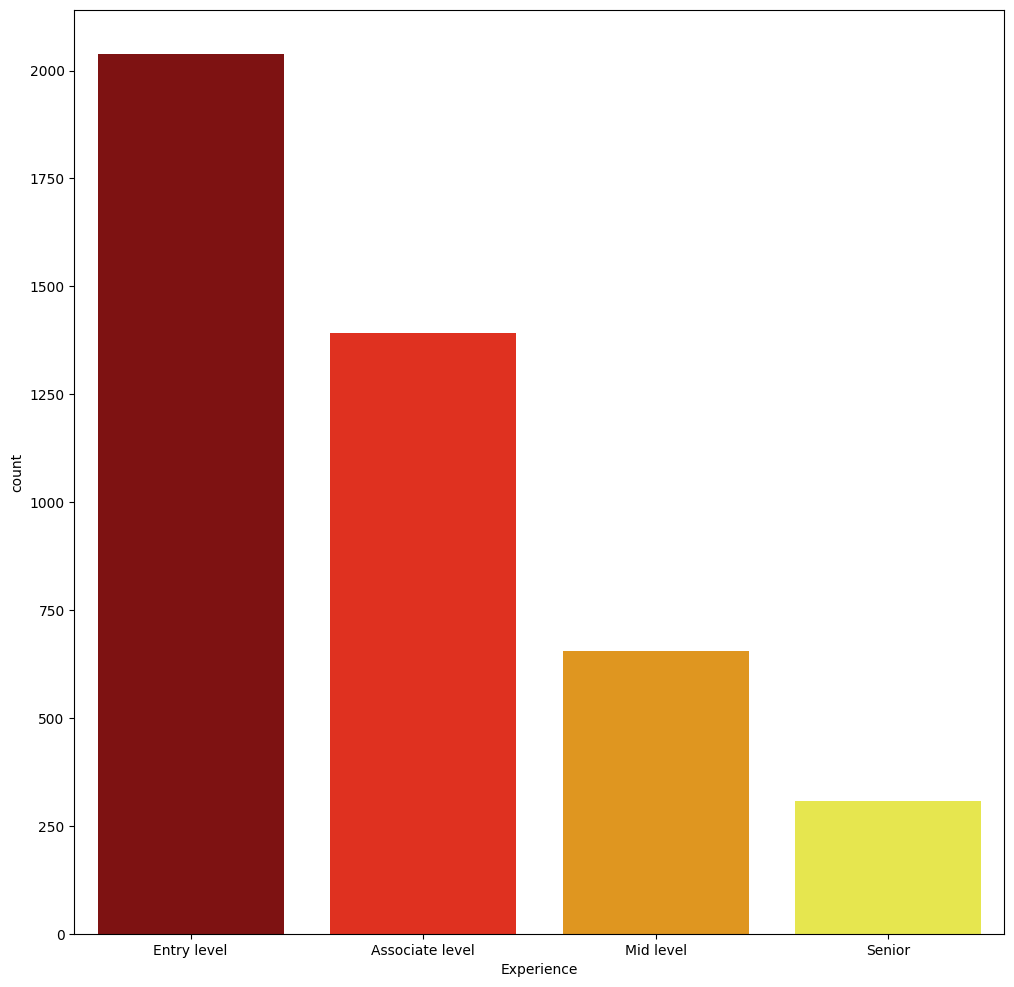

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(x='Experience', data=data, palette='hot', order=data['Experience'].value_counts().index)
plt.show()

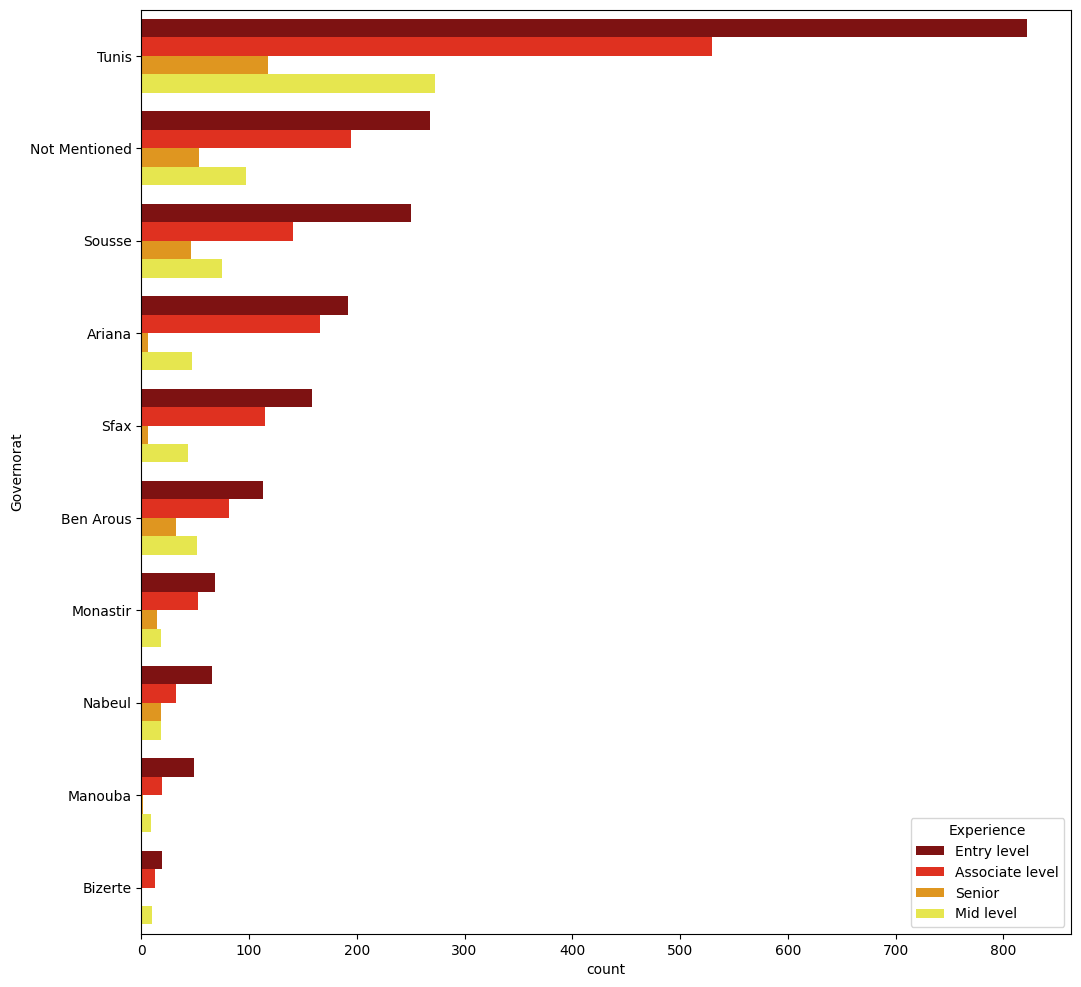

In [ ]:
#Count of the most common jobs posting by city & splitting them based on the level of jobs
plt.figure(figsize=(12,12))
sns.countplot(y='Governorat',hue='Experience',data=data,palette='hot',order=data['Governorat'].value_counts().nlargest(10).index)
plt.show()

In [ ]:
#Top 20 companies and top 5 cities
top20companiesListing = data['Entreprise'].value_counts().nlargest(20)
top10citiesOpenPos = data['Governorat'].value_counts().nlargest(5)

In [ ]:
top20companiesListing = pd.DataFrame(top20companiesListing)
top20companiesListing = top20companiesListing.rename(columns={'index': 'Company_name','Entreprise': 'Jobs listed'})
top20companiesListing.head(10)

,Jobs listed
RH PRO PLUS,92
SSCF,69
ADECCO TUNISIE,46
TMK Services,39
ARTUS,34
Databiz,27
Ben Yaghlane,26
Anonyme,26
Progress RH Tunisie,25
oscar pour la formation professionnelle,24


**Visualization**

In [ ]:
csv_file_path = 'ProcessesdData.csv'
data.to_csv(csv_file_path, index=False, encoding='utf-8-sig', mode="a", line_terminator="")

<ipython-input-56-dc27df1b0dfd>:2: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  data.to_csv(csv_file_path, index=False, encoding='utf-8-sig', mode="a", line_terminator="")
